### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
# Verificar valores nulos
loja.info()
loja2.info()
loja3.info()
loja4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns 

In [ ]:
# Eliminar os valores nulos (Se aplica de forma geral a todas as lojas por precaução e consistência)
loja.dropna(inplace=True)
loja2.dropna(inplace=True)
loja3.dropna(inplace=True)
loja4.dropna(inplace=True)

In [ ]:
# Calcular o faturamento de cada loja
faturamento_loja = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Exibir os resultados
print(f"Faturamento Loja: R$ {faturamento_loja:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")

Faturamento Loja: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


**Insights com referência aos resultados da análise de faturamento das lojas:**

Liderança da Loja 1
Maior faturamento é da loja 1, com R$1,53mi, superando a segunda loja em vendas, (loja 2) em R$46.050,06 e 9,8% acima da loja 4, indicando uma diferença significativa entre o topo e a base.

Desempenho Relativo
A loja 2 e a loja 3 têm resultados próximos, apresentando uma diferença de apenas 1,7% entre elas, sugerindo que estratégias similares podem estar sendo aplicadas.
A loja 4 está R$ 100.011,48 abaixo da loja 3, o que justifica uma investigação mais profunda do que está acontecendo.

Distribuição do Faturamento
As duas melhores lojas com relação a faturamento (loja 1 e loja 2) representam 62% do faturamento total, enquanto as duas últimas (loja 3 e loja 4) respondem por 38%.

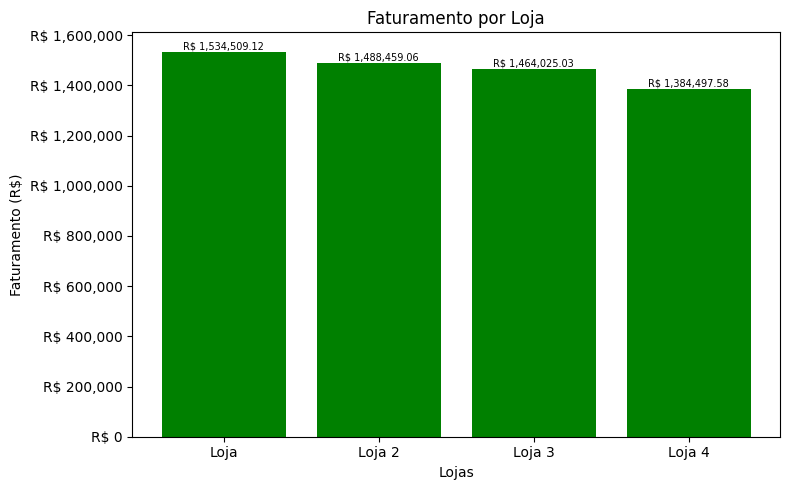

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter


# Dados de faturamento por loja
lojas = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Criar DataFrame de faturamento
df_faturamento = pd.DataFrame({'Loja': lojas, 'Faturamento': faturamento})

# Criar o gráfico de faturamento por loja
plt.figure(figsize=(8, 5))
plt.bar(df_faturamento['Loja'], df_faturamento['Faturamento'], color='#008000')

# definir título e rótulos
plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')

# Formatar o eixo Y
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('R$ {x:,.0f}'))

# Mostrar valores na parte superior das barras
for i, valor in enumerate(df_faturamento['Faturamento']):
    plt.text(i, valor + 10000, f'R$ {valor:,.2f}', ha='center', fontsize=7)

# Ajustar o layout
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [ ]:
lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']

# Agrupar e contar registros por categoria com groupby() e .size()
tabelas = [
    l.groupby('Categoria do Produto').size().rename(n)
    for l, n in zip(lojas, nomes)
]

# Unir as tabelas das informações, preenche com zero e converte valores para inteiro
tabela_final = pd.concat(tabelas, axis=1).fillna(0).astype(int)
print(tabela_final)

                       Loja  Loja 2  Loja 3  Loja 4
Categoria do Produto                               
brinquedos              324     313     315     338
eletrodomesticos        312     305     278     254
eletronicos             448     422     451     451
esporte e lazer         284     275     277     277
instrumentos musicais   182     224     177     170
livros                  173     197     185     187
moveis                  465     442     499     480
utilidades domesticas   171     181     177     201


**Insights com referência aos resultados das vendas por categoria:**

Categorias Mais Vendidas (Destaques)

Os móveis lideram em volume de vendas (1.886 unidades), com a loja 3 sendo a melhor (499 vendas).

Os eletrônicos têm desempenho forte (1.772 unidades), com loja 3 e loja 4 empatadas (451 vendas cada).

Os brinquedos têm vendas equilibradas, mas a Loja 4 se destaca (338 unidades).


Categorias com Baixo Desempenho

Instrumentos Musicais e Livros são as menos vendidas (753 e 742 unidades, respectivamente).

A loja 4 vende menos instrumentos musicais (170 unidades), enquanto a loja 2 tem o melhor desempenho nessa categoria (224).

Comportamento por Loja

A loja 3 domina em móveis (499) e tem bom desempenho em eletrônicos (451).

A loja 4 lidera em brinquedos (338) e utilidades domésticas (201), mas tem baixo desempenho em eletrodomésticos (254).

A loja 2 se destaca em instrumentos musicais (224) e livros (197), categorias onde as outras lojas têm resultados menores.


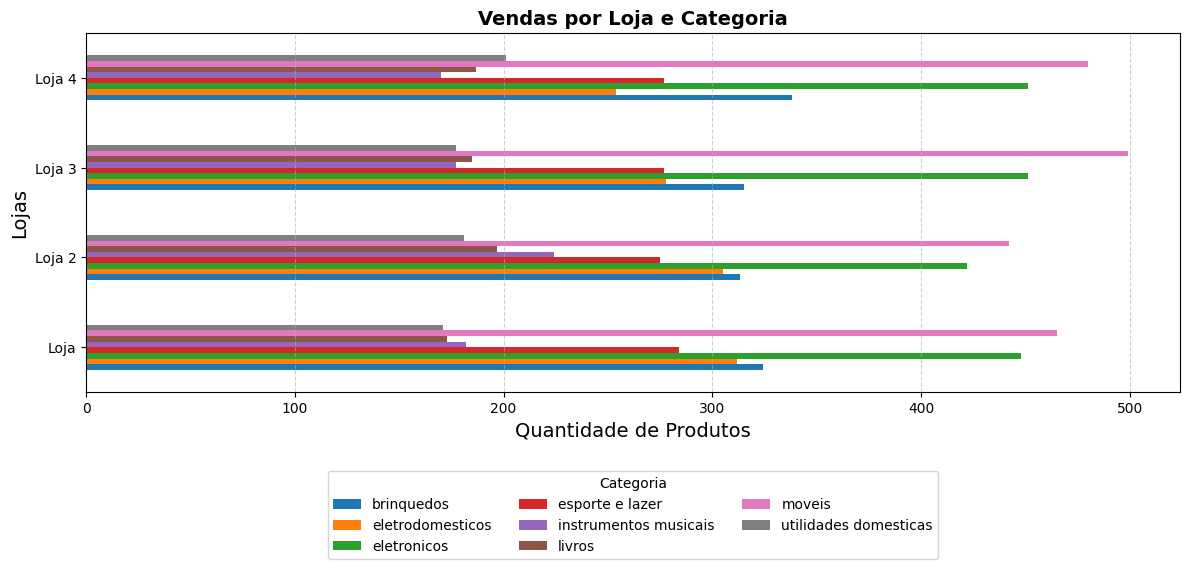

In [ ]:
# Criar gráfico horizontal
tabela_plot = tabela_final.T

# Definir paleta de cores
cores = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#808080']

# Criar gráfico horizontal
tabela_plot.plot(kind='barh', figsize=(12, 6), color=cores[:tabela_plot.shape[1]])

# Definir títulos e rótulos
plt.title('Vendas por Loja e Categoria', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Produtos', fontsize=14)
plt.ylabel('Lojas', fontsize=14)

#definir a legenda posição inferior
plt.legend(title='Categoria', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3, fontsize=10)

# definir grades para facilitar leitura
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
# Criar uma lista de DataFrames e nomes das lojas
lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']

# Calcular a média das avaliações da compra
medias_avaliacoes = {nome: l['Avaliação da compra'].mean() for l, nome in zip(lojas, nomes)}

# Converter o dicionário para DataFrame (visualização)
tabela_medias = pd.DataFrame.from_dict(medias_avaliacoes, orient='index', columns=['Média de Avaliações'])

# Exibir tabela final
print(tabela_medias)

        Média de Avaliações
Loja               3.976685
Loja 2             4.037304
Loja 3             4.048326
Loja 4             3.995759


**Insights com referência aos resultados da média das avaliações por loja:**

A loja 3 tem a melhor avaliação (4.048), seguida de perto pela loja 2 (4.037).

A diferença entre elas é mínima (0.011 pontos), indicando que ambas mantêm padrões similares de satisfação.

A loja 1 tem a pior avaliação (3.977), ficando 1.8% abaixo da loja 3.
Nesse caso, vale investigar se há problemas

A loja 4 está na média (3.996), mas abaixo das lojas 2 e 3.
A diferença para a Loja 3 (-0.053 pontos) sugere oportunidades de ajustes.

Em termo gerais, todas as lojas estão acima de 3.9, o que indica um bom nível de satisfação. Porém, nenhuma atinge 4.5+ (excelência), mostrando espaço para melhorias.


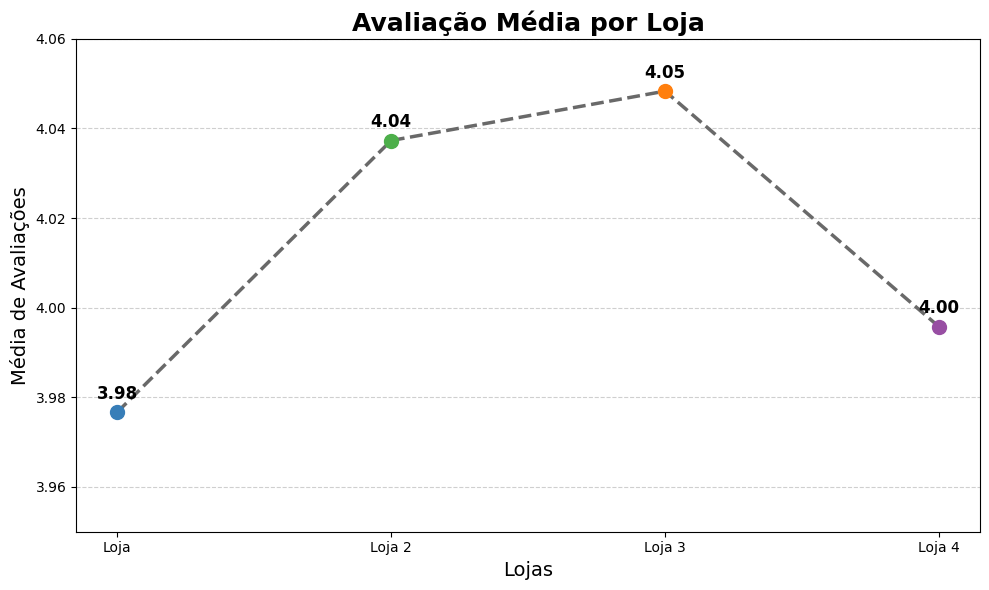

In [ ]:
# Dados da media por loja
lojas = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [3.976685, 4.037304, 4.048326, 3.995759]

# definir cor por ponto
cores = ['#377EB8', '#4DAF4A', '#FF7F0E', '#984EA3']
# Criar gráfico
plt.figure(figsize=(10, 6))
plt.plot(lojas, medias, marker='o', linestyle='--', linewidth=2.5, color='dimgray')

# Adicionando os pontos com cores individuais
for i in range(len(lojas)):
    plt.scatter(lojas[i], medias[i], color=cores[i], s=100, zorder=3)
    plt.text(lojas[i], medias[i] + 0.003, f"{medias[i]:.2f}", ha='center', fontsize=12, fontweight='bold')

# Título e rótulos
plt.title('Avaliação Média por Loja', fontsize=18, fontweight='bold')
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Média de Avaliações', fontsize=14)

# Limites para deixar visual mais agradável
plt.ylim(3.95, 4.06)

# Grid para facilitar leitura
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Layout ajustado
plt.tight_layout()

# Exibir
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Nomes por loja

lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']

# groupby().size() contar total de produtos por categoria e por loja
tabelas = [
    l.groupby('Categoria do Produto').size().rename(n)
    for l, n in zip(lojas, nomes)
]
tabela_final = pd.concat(tabelas, axis=1).fillna(0).astype(int)
print(tabela_final)

                       Loja  Loja 2  Loja 3  Loja 4
Categoria do Produto                               
brinquedos              324     313     315     338
eletrodomesticos        312     305     278     254
eletronicos             448     422     451     451
esporte e lazer         284     275     277     277
instrumentos musicais   182     224     177     170
livros                  173     197     185     187
moveis                  465     442     499     480
utilidades domesticas   171     181     177     201


**Insights com referência aos resultados produtos mais e menos vendidos por loja:**


Produtos Mais Vendidos (Destaques Gerais)

Móveis lideram com 1.886 unidades, sendo a loja 3 a maior vendedora (499 unidades).

Eletrônicos vêm em segundo lugar (1.772 unidades), com loja 3 e loja 4 empatadas (451 unidades cada).

Brinquedos têm desempenho sólido (1.290 unidades), com Loja 4 se destacando (338 unidades).


Produtos Menos Vendidos (Oportunidades)

Instrumentos Musicais (753 unidades) e Livros (742 unidades) são os menos vendidos.

Exceção: A Loja 2 vende significativamente mais instrumentos musicais (224 unidades) que as outras.

Utilidades Domésticas (730 unidades) também têm baixo volume, exceto na Loja 4 (201 unidades).


Desempenho por Loja

Loja 3:
Líder em móveis (499) e eletrônicos (451).
Desempenho mediano em outras categorias.

Loja 4:
Destaque em brinquedos (338) e utilidades domésticas (201).
Fraco desempenho em eletrodomésticos (254) e instrumentos musicais (170).

Loja 2:
Melhor em instrumentos musicais (224) e livros (197).
Resultados equilibrados nas demais categorias.

Loja 1:
Nenhum liderança em absoluto, mas o desempenho é consistente.


Padrões e Anomalias

Loja 2 vs. Outras em Instrumentos Musicais:
Vende 26% mais que a média das outras lojas. Pode ter melhor posicionamento ou promoções.


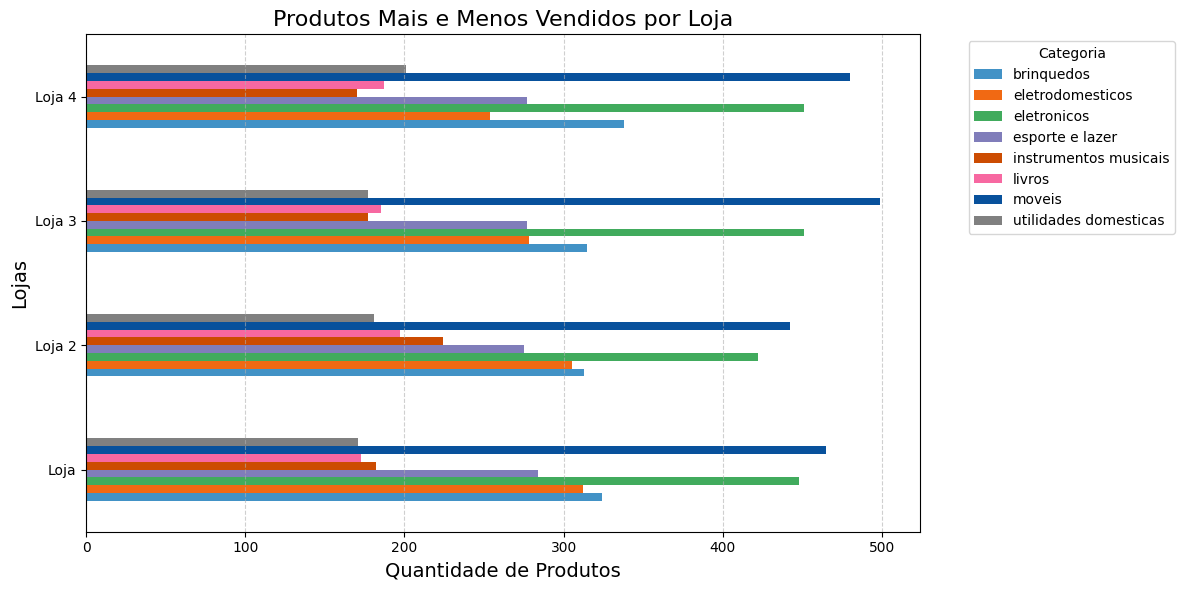

In [ ]:
# Definir a paleta de cores
cores = ['#4292C6', '#F16913', '#41AB5D', '#807DBA', '#CC4C02', '#F768A1', '#08519C', '#808080']

# Criar gráfico horizontal
tabela_plot = tabela_final.T
tabela_plot.plot(kind='barh', figsize=(12, 6), color=cores[:len(tabela_plot.columns)])

# definir títulos e rótulos
plt.title('Produtos Mais e Menos Vendidos por Loja', fontsize=16)
plt.xlabel('Quantidade de Produtos', fontsize=14)
plt.ylabel('Lojas', fontsize=14)

# Configuração da legenda
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')

# Dfinir grade para facilitar a visualização
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Ajustar o layout
plt.tight_layout()

# Imprimir o gráfico
plt.show()


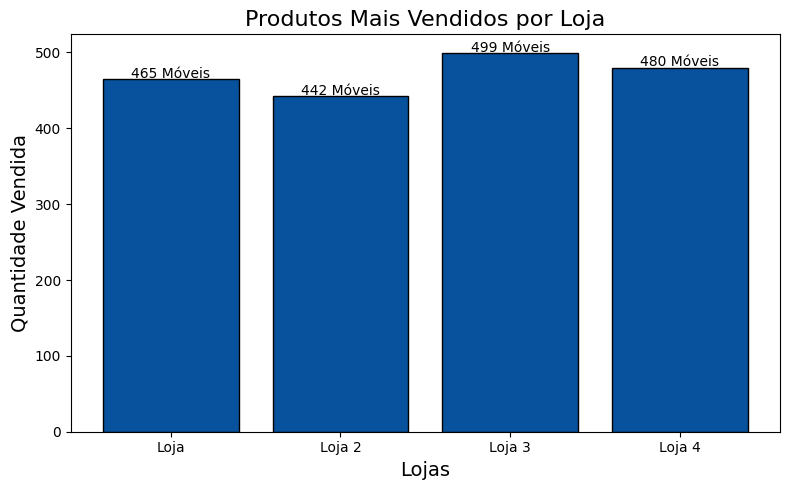

In [ ]:
# Dados da quantidade dos produtos mais vendidos
dados_mais_vendidos = pd.DataFrame({
    'Produto': ['Móveis', 'Móveis', 'Móveis', 'Móveis'],
    'Quantidade': [465, 442, 499, 480]
}, index=['Loja', 'Loja 2', 'Loja 3', 'Loja 4'])

# Definir gráfico com os rótulos detalhados
plt.figure(figsize=(8, 5))
plt.bar(dados_mais_vendidos.index, dados_mais_vendidos['Quantidade'], color='#08519C', edgecolor='black')

# Definir rótulos informando produto e quantidade
for i, (produto, quantidade) in enumerate(zip(dados_mais_vendidos['Produto'], dados_mais_vendidos['Quantidade'])):
    plt.text(i, quantidade + 2, f"{quantidade} {produto}", ha='center', fontsize=10)

# definir título e rótulos
plt.title('Produtos Mais Vendidos por Loja', fontsize=16)
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Quantidade Vendida', fontsize=14)

# Ajustar o layout
plt.tight_layout()

# Imprimir gráfico
plt.show()


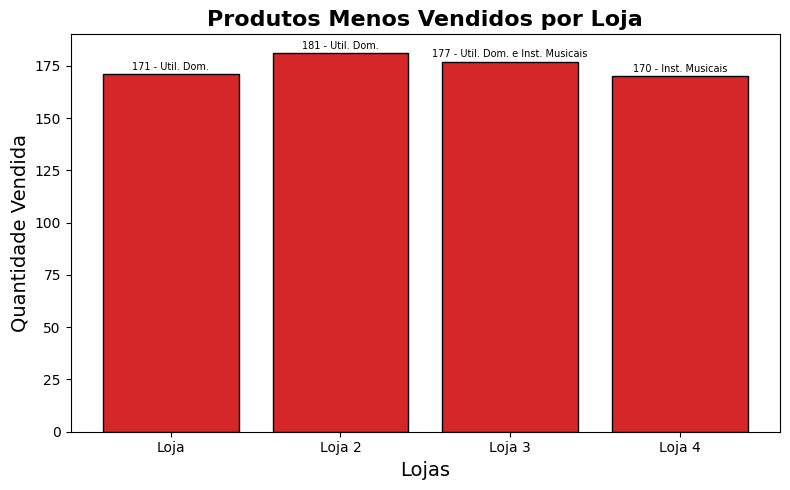

In [ ]:
# Dados produtos menos vendidos e quantidades
dados_menos_vendidos = pd.DataFrame({
    'Produto': ['Util. Dom.', 'Util. Dom.',
                'Util. Dom. e Inst. Musicais',
                'Inst. Musicais'],
    'Quantidade': [171, 181, 177, 170]
}, index=['Loja', 'Loja 2', 'Loja 3', 'Loja 4'])

# Criar gráfico
plt.figure(figsize=(8, 5))
plt.bar(dados_menos_vendidos.index, dados_menos_vendidos['Quantidade'], color='#D62728', edgecolor='black')

# Incluir rótulos
for i, (produto, quantidade) in enumerate(zip(dados_menos_vendidos['Produto'], dados_menos_vendidos['Quantidade'])):
    plt.text(i, quantidade + 2, f"{quantidade} - {produto}", ha='center', fontsize=7)

# Definir título e rótulos
plt.title('Produtos Menos Vendidos por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Quantidade Vendida', fontsize=14)

# Melhorar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()


# 5. Frete Médio por Loja


In [ ]:
# Calcular o custo médio do frete por loja
def calcular_frete(df, nome_loja):
    frete_total = df['Frete'].sum()
    frete_medio = df['Frete'].mean()
    return frete_total, frete_medio

# Calcular frete total e a média de cada loja
frete_loja_total, frete_loja_medio = calcular_frete(loja, 'Loja')
frete_loja2_total, frete_loja2_medio = calcular_frete(loja2, 'Loja 2')
frete_loja3_total, frete_loja3_medio = calcular_frete(loja3, 'Loja 3')
frete_loja4_total, frete_loja4_medio = calcular_frete(loja4, 'Loja 4')

# Imprimir os resultados formatados
print(f"--- Análise de Frete por Loja ---")
print(f"Loja: Frete Total = R$ {frete_loja_total:,.2f}, Frete Médio = R$ {frete_loja_medio:.2f}")
print(f"Loja 2: Frete Total = R$ {frete_loja2_total:,.2f}, Frete Médio = R$ {frete_loja2_medio:.2f}")
print(f"Loja 3: Frete Total = R$ {frete_loja3_total:,.2f}, Frete Médio = R$ {frete_loja3_medio:.2f}")
print(f"Loja 4: Frete Total = R$ {frete_loja4_total:,.2f}, Frete Médio = R$ {frete_loja4_medio:.2f}")

--- Análise de Frete por Loja ---
Loja: Frete Total = R$ 81,837.97, Frete Médio = R$ 34.69
Loja 2: Frete Total = R$ 79,314.16, Frete Médio = R$ 33.62
Loja 3: Frete Total = R$ 78,022.66, Frete Médio = R$ 33.07
Loja 4: Frete Total = R$ 73,755.88, Frete Médio = R$ 31.28


**Insights com referência aos resultados da análise de frete por loja:**

A Loja 1 tem o maior custo com frete (total e médio)

Frete médio de R$ 34,69 (até 10,9% mais caro que a Loja 4).


A Loja 4 tem o menor frete médio (R$ 31,28)
9,8% mais barato que a Loja 1, indicando eficiência logística.


As Lojas 2 e 3 têm fretes intermediários
Diferença pequena entre elas (apenas 1,6% no frete médio).
Loja 3 tem o segundo menor frete total, sugerindo gestão eficiente.


Discrepância nos fretes totais

A Loja 1 gasta R$ 8.082,09 a mais que a Loja 4 em frete no período analisado.

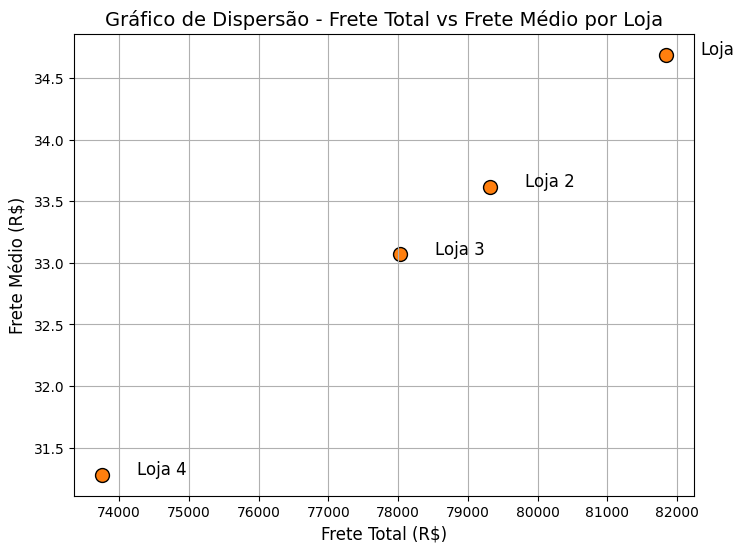

In [ ]:
# Dados por loja do frete total e frete médio
lojas = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']
frete_total = [81837.97, 79314.16, 78022.66, 73755.88]
frete_medio = [34.69, 33.62, 33.07, 31.28]

# Criar gráfico (dispersão)
plt.figure(figsize=(8,6))
plt.scatter(frete_total, frete_medio, color='#FF7F0E', s=100, edgecolor='black')

# Adicionar rótulos em cada ponto
for i, loja in enumerate(lojas):
    plt.text(frete_total[i] + 500, frete_medio[i], loja, fontsize=12)

# Definir título e rótulos
plt.title('Gráfico de Dispersão - Frete Total vs Frete Médio por Loja', fontsize=14)
plt.xlabel('Frete Total (R$)', fontsize=12)
plt.ylabel('Frete Médio (R$)', fontsize=12)

# Imprimir gráfico
plt.grid(True)
plt.show()

In [ ]:
!pip install folium
import folium

# Definir coordenadas das lojas
lojas = {
    'Loja 1': [(-23.55, -46.63), (-19.92, -43.94)],
    'Loja 2': [(-18.10, -44.38), (-22.25, -42.66), (-27.45, -50.95), (-30.17, -53.50), (-22.19, -48.79)],
    'Loja 3': [(-5.20, -39.53), (-30.17, -53.50), (-22.19, -48.79), (-13.29, -41.71), (-22.19, -48.79)],
    'Loja 4': [(-22.19, -48.79), (-15.98, -49.86), (-18.10, -44.38), (-18.10, -44.38), (-22.19, -48.79)]
}

# definir cor para cada loja
cores_lojas = {
    'Loja 1': 'red',
    'Loja 2': 'blue',
    'Loja 3': 'green',
    'Loja 4': 'orange'
}

# Criar mapa centralizado no Brasil
mapa = folium.Map(location=[-22.19, -48.79], zoom_start=5)

# Adicionar marcadores com o número da loja
for nome_loja, coords in lojas.items():
    numero = nome_loja.split()[-1]
    cor = cores_lojas[nome_loja]
    for coord in coords:
        folium.Marker(
            location=coord,
            popup=nome_loja,
            icon=folium.DivIcon(html=f"""

                    {numero}
                """)
        ).add_to(mapa)

mapa

6. RELATORIO FINAL

**Relatório: Análise Estratégica para Fechamento de Loja**

Objetivo

Identificar qual das 4 lojas apresenta o pior desempenho combinado (faturamento, vendas, avaliações e custos logísticos) para sugerir seu fechamento, otimizando recursos e mantendo a saúde financeira do negócio.


**Critérios de Avaliação**

Foram analisados os seguintes dados:

1.	Faturamento (receita total).
2.	Vendas por categoria (desempenho por produto).
3.	Avaliação dos clientes (satisfação).
4.	Custos logísticos (frete total e médio).


**Análise por Loja**

Loja 1

o	Pontos Fortes: Segundo maior faturamento, vendas sólidas em móveis/eletrônicos.

o	Pontos Fracos: Pior avaliação (3.976), frete mais caro (R$ 34,69).

o	Risco: Custos logísticos elevados podem corroer margens.


Loja 2

o	Pontos Fortes: Boa avaliação (4.037), destaque em categorias nichadas (instrumentos/livros).

o	Pontos Fracos: Faturamento médio, desempenho irregular em categorias principais.


Loja 3

o	Pontos Fortes: Melhor avaliação (4.048), líder em vendas de móveis/eletrônicos.

o	Pontos Fracos: Frete médio não é o mais baixo (R$ 33,07).


Loja 4

o	Pontos Fortes: Frete mais barato (R$ 31,28), bom desempenho em brinquedos/utilidades.

o	Pontos Fracos: Menor faturamento (R$ 1,38 mi), baixo desempenho em eletrodomésticos/instrumentos.



**Indicação para Fechamento: Loja 4**

Motivos

1.	Menor faturamento: Gera 9,8% menos receita que a Loja 1 e tem desempenho fraco em categorias estratégicas (eletrodomésticos).

2.	Impacto limitado: Seu fechamento afetaria menos o faturamento total (apenas ~10% do total).

3.	Custos logísticos baixos: Apesar de ser um ponto positivo, não compensa o baixo retorno financeiro.

4.	Desempenho médio em avaliações: Não se destaca em satisfação do cliente (Loja 3 é melhor).

**Alternativas Consideradas**

•	Loja 1: Apesar do frete caro, tem faturamento alto e vendas sólidas. Pode melhorar com ajustes logísticos.

•	Loja 2: Desempenho equilibrado, mas não é a pior em nenhum critério.

•	Loja 3: Melhor em avaliações e vendas; deve ser mantida.

**Conclusão**

A Loja 4 é a melhor candidata para fechamento devido ao faturamento mais baixo, impacto limitado no mix de produtos e ausência de vantagens competitivas (exceto frete barato, insuficiente para justificar sua operação). A economia gerada pode ser reinvestida em melhorias nas lojas restantes

